In [1]:
import urllib.request
import zipfile
import pandas as pd
import os
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns

In [2]:
url = 'https://files.grouplens.org/datasets/hetrec2011/hetrec2011-movielens-2k-v2.zip'
file_name= 'df.zip'
urllib.request.urlretrieve(url,file_name)
with zipfile.ZipFile(file_name, 'r') as zip_ref:
    zip_ref.extractall('all')
# 'all' is the name of the folder in which we want to extract the zip file

In [3]:
# we are saying that the content are seperated by (Tab) instead of comma.
df_movie_actors= pd.read_csv('all/movie_actors.dat', sep='\t', encoding='ISO-8859-1')

In [4]:
df_movie_actors.head()

,movieID,actorID,actorName,ranking
0,1,annie_potts,Annie Potts,10
1,1,bill_farmer,Bill Farmer,20
2,1,don_rickles,Don Rickles,3
3,1,erik_von_detten,Erik von Detten,13
4,1,greg-berg,Greg Berg,17


In [5]:
df_movie_countries= pd.read_csv('all/movie_countries.dat', sep='\t', encoding='ISO-8859-1')

In [6]:
df_movie_countries.head()

,movieID,country
0,1,USA
1,2,USA
2,3,USA
3,4,USA
4,5,USA


In [7]:
df_movie_directors= pd.read_csv('all/movie_directors.dat', sep='\t', encoding='ISO-8859-1')

In [8]:
df_movie_directors.head()

,movieID,directorID,directorName
0,1,john_lasseter,John Lasseter
1,2,joe_johnston,Joe Johnston
2,3,donald_petrie,Donald Petrie
3,4,forest_whitaker,Forest Whitaker
4,5,charles_shyer,Charles Shyer


In [9]:
df_movie_genres= pd.read_csv('all/movie_genres.dat', sep='\t', encoding='ISO-8859-1')

In [10]:
df_movie_genres.head()

,movieID,genre
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


In [11]:
df_movie_locations= pd.read_csv('all/movie_locations.dat', sep='\t', encoding='ISO-8859-1')

In [12]:
df_movie_locations.head()

,movieID,location1,location2,location3,location4
0,1,NaN,NaN,NaN,NaN
1,2,Canada,British Columbia,NaN,NaN
2,2,Canada,British Columbia,Delta,NaN
3,2,Canada,British Columbia,Delta,Tsawwassen
4,2,Canada,British Columbia,Maple Ridge,NaN


In [13]:
df_movie_tags= pd.read_csv('all/movie_tags.dat', sep='\t', encoding='ISO-8859-1')

In [14]:
df_movie_tags.head()

,movieID,tagID,tagWeight
0,1,7,1
1,1,13,3
2,1,25,3
3,1,55,3
4,1,60,1


In [15]:
df_movies= pd.read_csv('all/movies.dat', sep='\t', encoding='ISO-8859-1')

In [16]:
df_movies.head()

,id,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,...,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
0,1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9,73,73,...,100,8.5,17,17,0,100,3.7,102338,81,http://content7.flixster.com/movie/10/93/63/10...
1,2,Jumanji,113497,Jumanji,http://ia.media-imdb.com/images/M/MV5BMzM5NjE1...,1995,1068044-jumanji,5.6,28,13,...,46,5.8,5,2,3,40,3.2,44587,61,http://content8.flixster.com/movie/56/79/73/56...
2,3,Grumpy Old Men,107050,Dos viejos gruñones,http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...,1993,grumpy_old_men,5.9,36,24,...,66,7,6,5,1,83,3.2,10489,66,http://content6.flixster.com/movie/25/60/25602...
3,4,Waiting to Exhale,114885,Esperando un respiro,http://ia.media-imdb.com/images/M/MV5BMTczMTMy...,1995,waiting_to_exhale,5.6,25,14,...,56,5.5,11,5,6,45,3.3,5666,79,http://content9.flixster.com/movie/10/94/17/10...
4,5,Father of the Bride Part II,113041,Vuelve el padre de la novia (Ahora también abu...,http://ia.media-imdb.com/images/M/MV5BMTg1NDc2...,1995,father_of_the_bride_part_ii,5.3,19,9,...,47,5.4,5,1,4,20,3,13761,64,http://content8.flixster.com/movie/25/54/25542...


In [17]:
df_tags= pd.read_csv('all/tags.dat', sep='\t', encoding='ISO-8859-1')

In [18]:
df_tags.head()

,id,value
0,1,earth
1,2,police
2,3,boxing
3,4,painter
4,5,whale


In [19]:
df_user_ratedmovies= pd.read_csv('all/user_ratedmovies.dat', sep='\t', encoding='ISO-8859-1')

In [20]:
df_user_ratedmovies.head()

,userID,movieID,rating,date_day,date_month,date_year,date_hour,date_minute,date_second
0,75,3,1.0,29,10,2006,23,17,16
1,75,32,4.5,29,10,2006,23,23,44
2,75,110,4.0,29,10,2006,23,30,8
3,75,160,2.0,29,10,2006,23,16,52
4,75,163,4.0,29,10,2006,23,29,30


In [21]:
df_user_ratedmovies_timestamps= pd.read_csv('all/user_ratedmovies-timestamps.dat', sep='\t', encoding='ISO-8859-1')

In [22]:
df_user_ratedmovies_timestamps.head()

,userID,movieID,rating,timestamp
0,75,3,1.0,1162160236000
1,75,32,4.5,1162160624000
2,75,110,4.0,1162161008000
3,75,160,2.0,1162160212000
4,75,163,4.0,1162160970000


In [23]:
df_user_taggedmovies= pd.read_csv('all/user_taggedmovies.dat', sep='\t', encoding='ISO-8859-1')

In [24]:
df_user_taggedmovies.head()

,userID,movieID,tagID,date_day,date_month,date_year,date_hour,date_minute,date_second
0,75,353,5290,29,10,2006,23,20,15
1,78,4223,5264,16,4,2007,4,43,45
2,127,1343,1544,28,8,2007,3,42,27
3,127,1343,12330,28,8,2007,3,42,27
4,127,2080,1451,28,8,2007,3,42,47


In [25]:
df_user_taggedmovies_timestamps= pd.read_csv('all/user_taggedmovies-timestamps.dat', sep='\t', encoding='ISO-8859-1')

In [26]:
df_user_taggedmovies_timestamps.head()

,userID,movieID,tagID,timestamp
0,75,353,5290,1162160415000
1,78,4223,5264,1176691425000
2,127,1343,1544,1188265347000
3,127,1343,12330,1188265347000
4,127,2080,1451,1188265367000


In [27]:
# Explore the content of the loaded data and obtain some statistics

df_user_ratedmovies_timestamps.head()

,userID,movieID,rating,timestamp
0,75,3,1.0,1162160236000
1,75,32,4.5,1162160624000
2,75,110,4.0,1162161008000
3,75,160,2.0,1162160212000
4,75,163,4.0,1162160970000


In [28]:
df_user_ratedmovies_timestamps.describe()

,userID,movieID,rating,timestamp
count,855598.000000,855598.000000,855598.000000,8.555980e+05
mean,35190.832551,8710.179402,3.437945,1.130530e+12
std,20385.003347,14446.852908,1.002561,7.178767e+10
min,75.000000,1.000000,0.500000,8.745324e+11
25%,18161.000000,1367.000000,3.000000,1.092553e+12
50%,33866.000000,3249.000000,3.500000,1.144843e+12
75%,52004.000000,6534.000000,4.000000,1.184265e+12
max,71534.000000,65133.000000,5.000000,1.231130e+12


In [29]:
df_user_ratedmovies_timestamps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855598 entries, 0 to 855597
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userID     855598 non-null  int64  
 1   movieID    855598 non-null  int64  
 2   rating     855598 non-null  float64
 3   timestamp  855598 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 26.1 MB


In [30]:
df_user_ratedmovies_timestamps['userID'].value_counts(dropna=False)

6757     3410
30687    2908
30500    2823
62332    2763
51033    2631
         ... 
54250      20
48803      20
26873      20
28180      20
59995      20
Name: userID, Length: 2113, dtype: int64

In [31]:
df_user_ratedmovies_timestamps['userID'].value_counts(dropna=False).count()

2113

In [32]:
df_user_ratedmovies_timestamps['movieID'].value_counts(dropna=False)

2571    1670
4993    1576
356     1568
296     1537
5952    1528
        ... 
6138       1
6274       1
1386       1
7109       1
8393       1
Name: movieID, Length: 10109, dtype: int64

In [33]:
df_user_ratedmovies_timestamps['movieID'].value_counts(dropna=False).count()

10109

In [34]:
# number of interaction between users and movies
df_user_ratedmovies_timestamps[['userID','movieID']].value_counts(dropna=False)

userID  movieID
75      3          1
46085   52462      1
        41425      1
        41527      1
        41569      1
                  ..
23753   34048      1
        34150      1
        34162      1
        35836      1
71534   62049      1
Length: 855598, dtype: int64

In [35]:
df_user_ratedmovies_timestamps[['userID','movieID']].value_counts(dropna=False).count()

855598

In [36]:
# A related statistic that tells us how difficult the recommendation task will be is the density of the dataset
# a) the number of ratings we have available in the system
# b) the number of ratings we would have if all users rated everything

# density is: a/b, so:

density = 855598/ (2113 * 10109)
print('the density is:', density)
# density = 1 - sparsity
# sparsity is:
sparsity = 1-density
print('the sparsity is:', sparsity)

the density is: 0.040055491685820954
the sparsity is: 0.9599445083141791


In [37]:
df_user_ratedmovies_timestamps.head(10)

,userID,movieID,rating,timestamp
0,75,3,1.0,1162160236000
1,75,32,4.5,1162160624000
2,75,110,4.0,1162161008000
3,75,160,2.0,1162160212000
4,75,163,4.0,1162160970000
5,75,165,4.5,1162160715000
6,75,173,3.5,1162160257000
7,75,296,5.0,1162160689000
8,75,353,3.5,1162160220000
9,75,420,2.0,1162160202000


In [38]:
df_user_ratedmovies_timestamps['rating'].value_counts(dropna=False).values

array([215773, 155918, 150582,  88652,  71680,  62454,  57188,  21535,
        18328,  13488], dtype=int64)

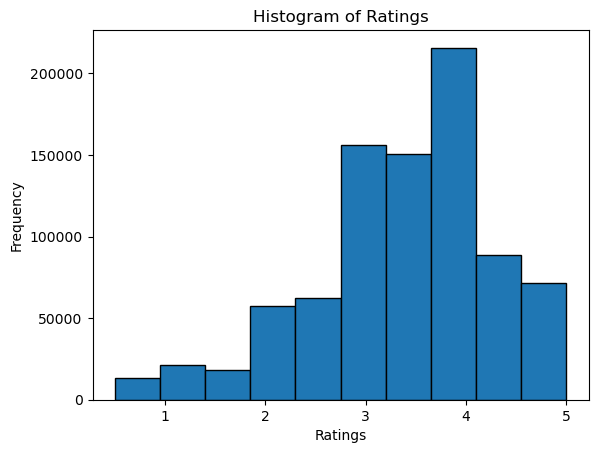

In [39]:
# histogram of the rating values

df_user_ratedmovies_timestamps['rating'].plot.hist(bins=10, edgecolor= 'black')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')
plt.show()

In [40]:
# plot the distribution of movieID on a log scale (to show the diagram of how many ratings we have for each movie) -----log of data

In [41]:
np.log(df_user_ratedmovies_timestamps['movieID'].value_counts(dropna=False).values)

array([7.42057891, 7.36264527, 7.3575562 , ..., 0.        , 0.        ,
       0.        ])

In [42]:
y = np.log(df_user_ratedmovies_timestamps['movieID'].value_counts(dropna=False).values)

In [43]:
x = range(df_user_ratedmovies_timestamps['movieID'].nunique())

In [44]:
x

range(0, 10109)

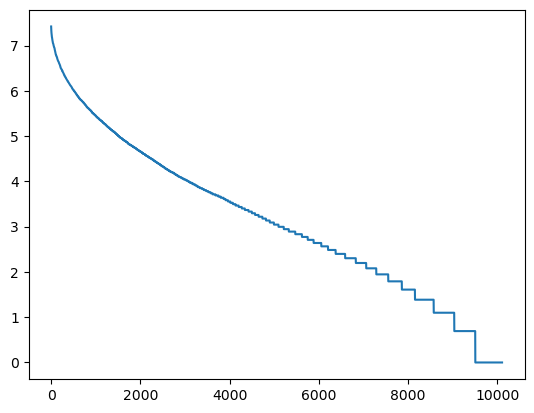

In [45]:
plt.plot(x, y)

In [46]:
# plot the distribution of movieID on a log scale (to show the diagram of how many ratings we have for each movie) -----original data

In [47]:
y = df_user_ratedmovies_timestamps['movieID'].value_counts(dropna=False).values

In [48]:
x = range(df_user_ratedmovies_timestamps['movieID'].nunique())

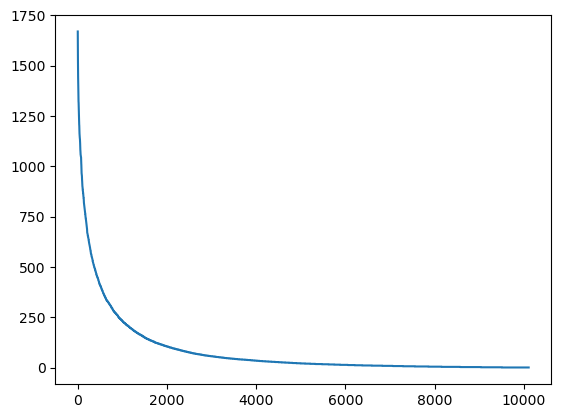

In [49]:
plt.plot(x, y)

In [50]:
# plot the distribution of userID on a log scale (to show the diagram of how many ratings we have for each user) -----log of data

In [51]:
np.log(df_user_ratedmovies_timestamps['userID'].value_counts(dropna=False).values)

array([8.13446757, 7.97522084, 7.94555543, ..., 2.99573227, 2.99573227,
       2.99573227])

In [52]:
y = np.log(df_user_ratedmovies_timestamps['userID'].value_counts(dropna=False).values)

In [53]:
x = range(df_user_ratedmovies_timestamps['userID'].nunique())

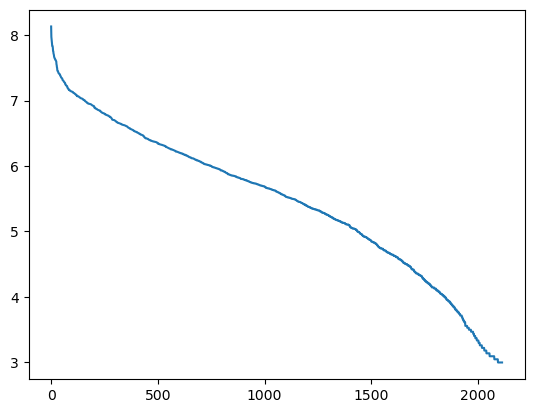

In [54]:
plt.plot(x,y)

In [55]:
# plot the distribution of userID on a log scale (to show the diagram of how many ratings we have for each user) -----original data

In [56]:
y = df_user_ratedmovies_timestamps['userID'].value_counts(dropna=False).values

In [57]:
x = range(df_user_ratedmovies_timestamps['userID'].nunique())

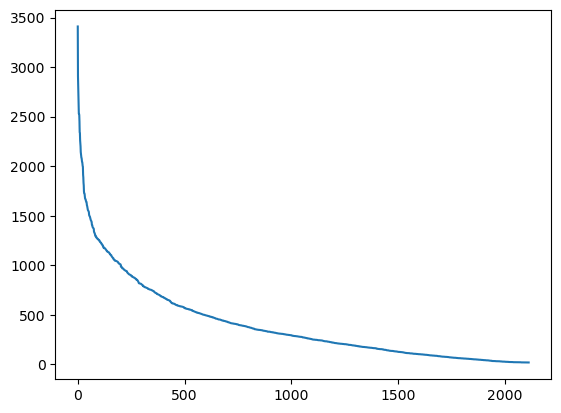

In [58]:
plt.plot(x,y)

In [59]:
# These two diagrams can be replaced by KDE plots

C:\Users\enabi\AppData\Local\Temp\ipykernel_14088\1939954451.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_user_ratedmovies_timestamps['userID'].value_counts(dropna=False).values, color='b', shade=True)


Text(0, 0.5, 'Probability Density')

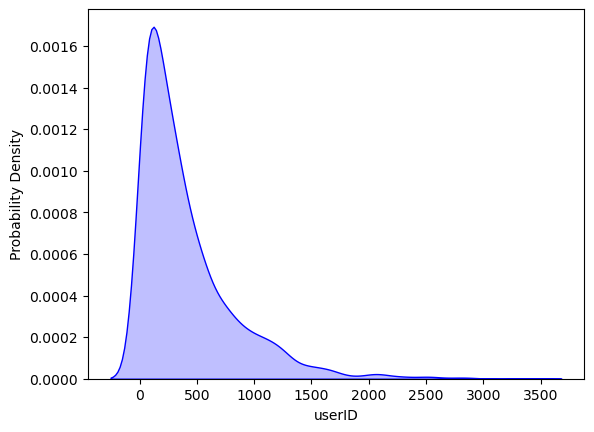

In [60]:
# Plotting the KDE Plot for user ID - original
sns.kdeplot(df_user_ratedmovies_timestamps['userID'].value_counts(dropna=False).values, color='b', shade=True)
  
# Setting the X and Y Label
plt.xlabel('userID')
plt.ylabel('Probability Density')

<Axes: >

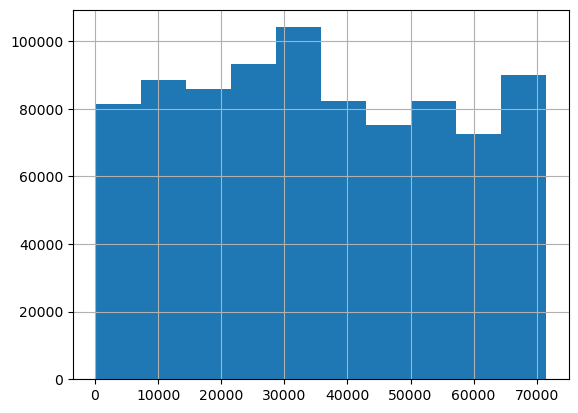

In [61]:
df_user_ratedmovies_timestamps['userID'].hist()

<Axes: xlabel='userID'>

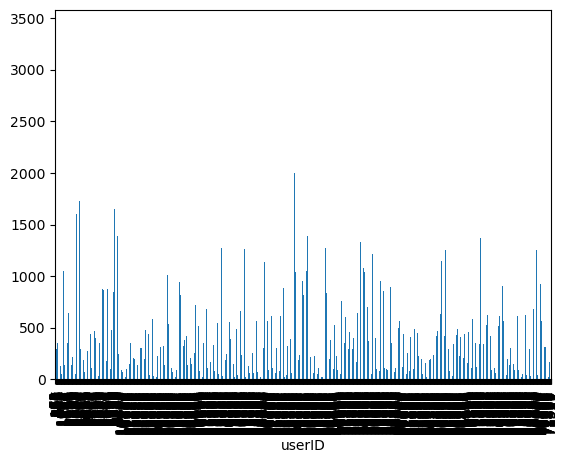

In [62]:
df_user_ratedmovies_timestamps.groupby(['userID'])['rating'].count().plot(kind='bar')

C:\Users\enabi\AppData\Local\Temp\ipykernel_14088\2147656595.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_user_ratedmovies_timestamps['userID'], color='b', shade=True)


Text(0, 0.5, 'Probability Density')

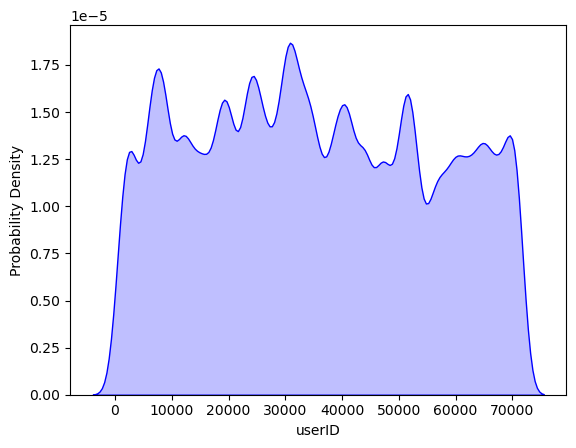

In [63]:
# Plotting the KDE Plot for user ID 
sns.kdeplot(df_user_ratedmovies_timestamps['userID'], color='b', shade=True)
  
# Setting the X and Y Label
plt.xlabel('userID')
plt.ylabel('Probability Density')

C:\Users\enabi\AppData\Local\Temp\ipykernel_14088\3469957836.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_user_ratedmovies_timestamps['movieID'].value_counts(dropna=False).values, color='r', shade=True)


Text(0, 0.5, 'Probability Density')

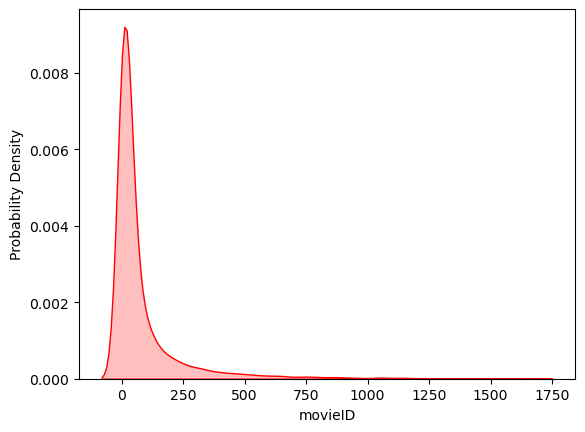

In [64]:
# Plotting the KDE Plot for movie ID - original
sns.kdeplot(df_user_ratedmovies_timestamps['movieID'].value_counts(dropna=False).values, color='r', shade=True)
  
# Setting the X and Y Label
plt.xlabel('movieID')
plt.ylabel('Probability Density')

C:\Users\enabi\AppData\Local\Temp\ipykernel_14088\3280128708.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_user_ratedmovies_timestamps['movieID'], color='r', shade=True)


Text(0, 0.5, 'Probability Density')

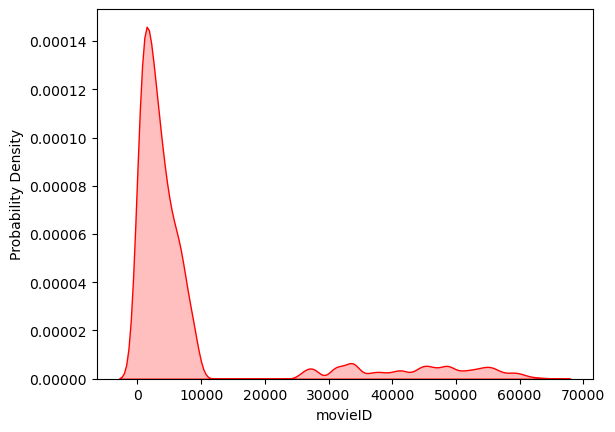

In [65]:
# Plotting the KDE Plot for movie ID - original
sns.kdeplot(df_user_ratedmovies_timestamps['movieID'], color='r', shade=True)
  
# Setting the X and Y Label
plt.xlabel('movieID')
plt.ylabel('Probability Density')

C:\Users\enabi\AppData\Local\Temp\ipykernel_14088\1844013345.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_user_ratedmovies_timestamps['userID'], color='b', shade=True)
C:\Users\enabi\AppData\Local\Temp\ipykernel_14088\1844013345.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_user_ratedmovies_timestamps['movieID'], color='r', shade=True)


Text(0, 0.5, 'Probability Density')

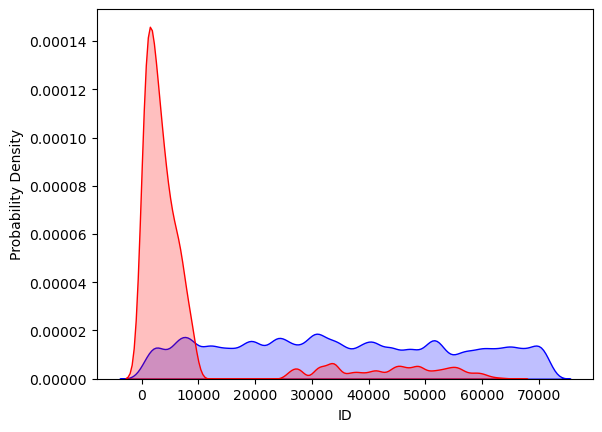

In [66]:
# Plotting the KDE Plot
sns.kdeplot(df_user_ratedmovies_timestamps['userID'], color='b', shade=True)

sns.kdeplot(df_user_ratedmovies_timestamps['movieID'], color='r', shade=True)
  
plt.xlabel('ID')
plt.ylabel('Probability Density')